<div style="background: linear-gradient(135deg, #1a1a2e 0%, #16213e 100%); padding: 30px; border-radius: 15px; margin-bottom: 20px;">
    <h1 style="color: #ffffff; text-align: center; margin: 0; font-size: 2.5em;">🌳 Decision Tree Algorithm</h1>
    <p style="color: #a0a0a0; text-align: center; font-size: 1.2em; margin-top: 10px;">Complete Mathematical Intuition & Deep Dive</p>
</div>

## 📑 Table of Contents

1. [Decision Tree Fundamentals](#1-decision-tree-fundamentals)
2. [Decision Tree Classifier](#2-decision-tree-classifier)
3. [Entropy](#3-entropy)
4. [Gini Impurity](#4-gini-impurity)
5. [Entropy vs Gini Impurity](#5-entropy-vs-gini-impurity)
6. [Information Gain](#6-information-gain)
7. [Numerical Feature Splits](#7-numerical-feature-splits)
8. [Pruning Techniques](#8-pruning-techniques)
9. [Decision Tree Regressor](#9-decision-tree-regressor)
10. [Quick Revision Summary](#10-quick-revision-summary)
11. [Interview Questions](#11-interview-questions)

---
<a id="1-decision-tree-fundamentals"></a>
# 1. Decision Tree Fundamentals

## Core Concept

Decision Tree works like **nested if-else conditions** — it recursively splits data based on feature conditions until it reaches a pure leaf node (final decision).

- Used for both **Classification** and **Regression**
- Foundation for ensemble methods: Random Forest, XGBoost, AdaBoost
- Creates a tree-like structure of decisions

## Types of Decision Trees (ID3 vs CART)

| Property | ID3(Iterative Dichotomiser 3) | CART(Classification and Regression Trees) |
|:---------|:---:|:----:|
| Split Type | Multi-way splits | Binary splits only |
| Splits per node | Can have 3+ children | Always 2 children |
| Used in sklearn |  No |  **Yes (Default)** |

<div style="background-color: #3c7a49ff; border-left: 5px solid #c62828; padding: 15px; margin: 15px 0; border-radius: 0 8px 8px 0;">
    <strong>⚠️ Important:</strong> sklearn's <code>DecisionTreeClassifier</code> and <code>DecisionTreeRegressor</code> use <strong>CART algorithm</strong> — always binary splits!
</div>

## Visual: Decision Tree Structure

```
                    ┌─────────────────┐
                    │   Age ≤ 15?     │  ← Root Node
                    └────────┬────────┘
                             │
              ┌──────────────┴──────────────┐
              │ Yes                         │ No
              ▼                             ▼
    ┌─────────────────┐           ┌─────────────────┐
    │ Person is in    │           │   Age ≤ 21?     │  ← Internal Node
    │    School       │           └────────┬────────┘
    └─────────────────┘                    │
         ↑ Leaf Node          ┌────────────┴────────────┐
                              │ Yes                     │ No
                              ▼                         ▼
                    ┌─────────────────┐       ┌─────────────────┐
                    │ Person in       │       │ Passed College  │
                    │   College       │       │                 │
                    └─────────────────┘       └─────────────────┘
                         ↑ Leaf Node               ↑ Leaf Node
```

---
<a id="2-decision-tree-classifier"></a>
# 2. Decision Tree Classifier

## Two Key Questions

| # | Question | Technique Used |
|:-:|:---------|:---------------|
| 1 | **Purity Check:** Is this split pure or impure? | Entropy or Gini Impurity |
| 2 | **Feature Selection:** Which feature should I split on? | Information Gain |

<div style="background-color: #287ab5ff; border-left: 5px solid #1565c0; padding: 15px; margin: 15px 0; border-radius: 0 8px 8px 0;">
    <strong>📘 Definition:</strong><br>
    <strong>Pure Split:</strong> A node containing only one class (all Yes or all No)<br>
    <strong>Impure Split:</strong> A node containing mixed classes (both Yes and No)
</div>

## Leaf Node

- Terminal node where no further splitting occurs
- Contains only one class (pure split)
- Represents the final decision/prediction

---
<a id="3-entropy"></a>
# 3. Entropy

<div style="background-color: #287ab5ff; border-left: 5px solid #1565c0; padding: 15px; margin: 15px 0; border-radius: 0 8px 8px 0;">
    <strong>📘 Definition:</strong> <strong>Entropy</strong> measures the impurity or randomness in a node.
</div>

## Formula

**For Binary Classification:**

$$\Large \boxed{H(S) = -p_{+} \log_2(p_{+}) - p_{-} \log_2(p_{-})}$$

Where:
- $p_{+}$ = Probability of positive class (e.g., "Yes")
- $p_{-}$ = Probability of negative class (e.g., "No")
- $p_{+} + p_{-} = 1$

**For Multi-class Classification:**

$$H(S) = -\sum_{i=1}^{n} p_i \log_2(p_i)$$

<div style="background-color: #8c3999ff; border-left: 5px solid #7b1fa2; padding: 15px; margin: 15px 0; border-radius: 0 8px 8px 0;">
    <strong>🔮 Remember:</strong> Entropy value ranges: <code>0 ≤ H(S) ≤ 1</code>
    <ul>
        <li><strong>H(S) = 0</strong> → Pure split (all same class)</li>
        <li><strong>H(S) = 1</strong> → Maximum impurity (50-50 split)</li>
    </ul>
</div>

## Entropy Calculation Example

**Scenario:** After a split, we get:
- Category $C_1$: 3 Yes, 3 No
- Category $C_2$: 3 Yes, 0 No

### For $C_1$ (Impure Split):

$$\begin{align}
H(C_1) &= -\frac{3}{6}\log_2\left(\frac{3}{6}\right) - \frac{3}{6}\log_2\left(\frac{3}{6}\right) \\
&= -\frac{1}{2}\log_2\left(\frac{1}{2}\right) - \frac{1}{2}\log_2\left(\frac{1}{2}\right) \\
&= -\frac{1}{2}(-1) - \frac{1}{2}(-1) \\
&= \boxed{1} \quad \text{(Maximum Impurity)}
\end{align}$$

### For $C_2$ (Pure Split):

$$\begin{align}
H(C_2) &= -\frac{3}{3}\log_2\left(\frac{3}{3}\right) - \frac{0}{3}\log_2\left(\frac{0}{3}\right) \\
&= -1 \cdot \log_2(1) - 0 \\
&= -1 \cdot 0 \\
&= \boxed{0} \quad \text{(Pure Split)}
\end{align}$$

In [2]:
# Entropy Calculation in Python
import numpy as np

def entropy(y):
    """Calculate entropy of a label array"""
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return -np.sum(probabilities * np.log2(probabilities + 1e-10))

# Example: Impure split (3 Yes, 3 No)
c1 = ['Yes', 'Yes', 'Yes', 'No', 'No', 'No']
print(f"Entropy of C1 (3Y, 3N): {entropy(c1):.4f}")  # Should be 1.0

# Example: Pure split (3 Yes, 0 No)
c2 = ['Yes', 'Yes', 'Yes']
print(f"Entropy of C2 (3Y, 0N): {entropy(c2):.4f}")  # Should be 0.0

Entropy of C1 (3Y, 3N): 1.0000
Entropy of C2 (3Y, 0N): -0.0000


## Entropy Curve

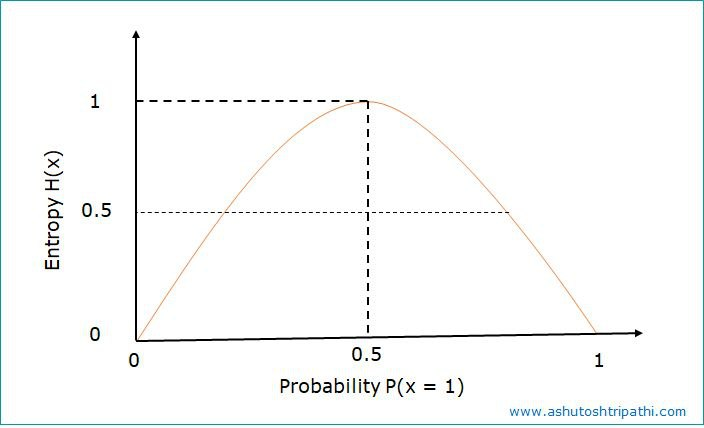

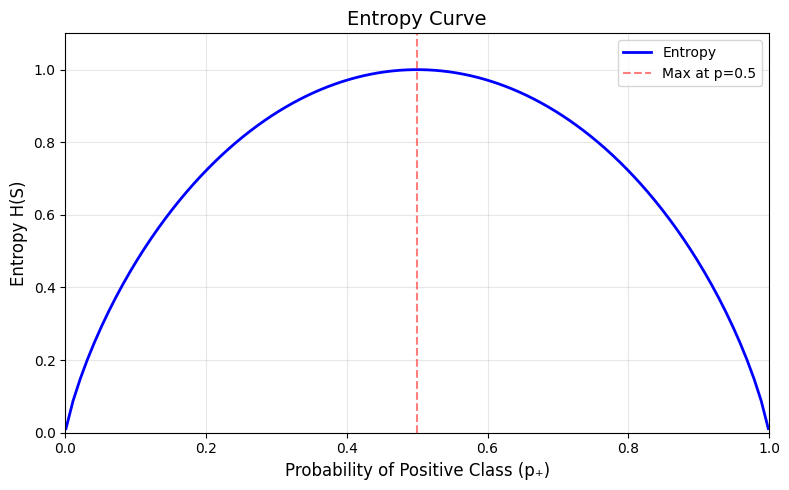

In [3]:
# Visualize Entropy Curve
import matplotlib.pyplot as plt
import numpy as np

p = np.linspace(0.001, 0.999, 100)
entropy_values = -p * np.log2(p) - (1-p) * np.log2(1-p)

plt.figure(figsize=(8, 5))
plt.plot(p, entropy_values, 'b-', linewidth=2, label='Entropy')
plt.axvline(x=0.5, color='r', linestyle='--', alpha=0.5, label='Max at p=0.5')
plt.xlabel('Probability of Positive Class (p₊)', fontsize=12)
plt.ylabel('Entropy H(S)', fontsize=12)
plt.title('Entropy Curve', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 1)
plt.ylim(0, 1.1)
plt.tight_layout()
plt.show()

---
<a id="4-gini-impurity"></a>
# 4. Gini Impurity

<div style="background-color: #287ab5ff; border-left: 5px solid #1565c0; padding: 15px; margin: 15px 0; border-radius: 0 8px 8px 0;">
    <strong>📘 Definition:</strong> <strong>Gini Impurity</strong> measures the probability of incorrectly classifying a randomly chosen element.
</div>

## Formula

**General Formula:**

$$\Large \boxed{Gini = 1 - \sum_{i=1}^{n} p_i^2}$$

**For Binary Classification:**

$$Gini = 1 - (p_{+})^2 - (p_{-})^2$$

<div style="background-color: #863293ff; border-left: 5px solid #7b1fa2; padding: 15px; margin: 15px 0; border-radius: 0 8px 8px 0;">
    <strong>🔮 Remember:</strong> Gini Impurity value ranges: <code>0 ≤ Gini ≤ 0.5</code>
    <ul>
        <li><strong>Gini = 0</strong> → Pure split</li>
        <li><strong>Gini = 0.5</strong> → Maximum impurity (50-50 split)</li>
    </ul>
</div>

## Gini Calculation Example

### Impure Split (3 Yes, 3 No):

$$\begin{align}
Gini &= 1 - \left(\frac{3}{6}\right)^2 - \left(\frac{3}{6}\right)^2 \\
&= 1 - \left(\frac{1}{2}\right)^2 - \left(\frac{1}{2}\right)^2 \\
&= 1 - 0.25 - 0.25 \\
&= \boxed{0.5} \quad \text{(Maximum Impurity)}
\end{align}$$

### Pure Split (3 Yes, 0 No):

$$\begin{align}
Gini &= 1 - \left(\frac{3}{3}\right)^2 - \left(\frac{0}{3}\right)^2 \\
&= 1 - 1 - 0 \\
&= \boxed{0} \quad \text{(Pure Split)}
\end{align}$$

In [4]:
# Gini Impurity Calculation in Python
import numpy as np

def gini_impurity(y):
    """Calculate Gini impurity of a label array"""
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return 1 - np.sum(probabilities ** 2)

# Example: Impure split (3 Yes, 3 No)
c1 = ['Yes', 'Yes', 'Yes', 'No', 'No', 'No']
print(f"Gini of C1 (3Y, 3N): {gini_impurity(c1):.4f}")  # Should be 0.5

# Example: Pure split (3 Yes, 0 No)
c2 = ['Yes', 'Yes', 'Yes']
print(f"Gini of C2 (3Y, 0N): {gini_impurity(c2):.4f}")  # Should be 0.0

Gini of C1 (3Y, 3N): 0.5000
Gini of C2 (3Y, 0N): 0.0000


---
<a id="5-entropy-vs-gini-impurity"></a>
# 5. Entropy vs Gini Impurity

## Entropy vs Gini Impurity (Decision Tree)

**Entropy** and **Gini Impurity** dono ka kaam same hai:  
decision tree ke kisi node par **kitni impurity / confusion hai** ye measure karna.

---

### Entropy

Entropy ka matlab hota hai **uncertainty**.  
Entropy ye batati hai ki kisi node par class label predict karne ke liye  
abhi kitni information ki kami hai.

Agar node completely pure hai (sirf ek hi class hai),  
to koi uncertainty nahi hoti aur entropy zero hoti hai.  
Jaise-jaise classes mix hoti jaati hain, entropy badhti jaati hai  
aur 50–50 split par maximum hoti hai.

Entropy ka formula:

$$
\text{Entropy} = -\sum_{i=1}^{C} p_i \log_2(p_i)
$$

Binary classification ke case me:

$$
\text{Entropy} = -\big(p \log_2 p + (1-p)\log_2(1-p)\big)
$$

Entropy **logarithmic** nature ki hoti hai,  
isliye ye chhoti impurity ko bhi kaafi seriously treat karti hai  
aur zyada sensitive hoti hai.

---

### Gini Impurity

Gini Impurity ka matlab hota hai **galat classification ki probability**.  
Ye measure karti hai ki agar node ke class distribution ke hisaab se  
randomly label assign kiya jaaye, to kitni probability hai ki prediction galat hoga.

Agar node pure hai, to galat hone ka chance zero hota hai  
aur gini impurity bhi zero hoti hai.  
Agar classes evenly mixed hain, to galat hone ka chance maximum hota hai.

Gini Impurity ka formula:

$$
\text{Gini} = 1 - \sum_{i=1}^{C} p_i^2
$$

Binary classification ke case me:

$$
\text{Gini} = 1 - \big(p^2 + (1-p)^2\big)
$$

Gini **quadratic** function use karti hai,  
isliye calculation fast hota hai  
aur dominant class ko thoda zyada importance milta hai.

---

### Core Difference (Intuition Level)

Entropy poochti hai:  
**“Is node me abhi kitni uncertainty bachi hui hai?”**

Gini poochti hai:  
**“Agar main andha hoke guess karu, to kitni baar galat ho jaunga?”**

Dono ka goal same hai —  
**split ke baad node ko zyada pure banana**.

---

### Practical Insight

Entropy aur Gini ka graph shape-wise kaafi similar hota hai  
aur real datasets me dono aksar **same split choose karte hain**.  
Difference zyada tar **scale, interpretation aur computation speed** ka hota hai.

Isiliye practical machine learning libraries  
(jaise `sklearn`) default me **Gini Impurity** use karti hain,  
kyunki ye faster hai aur accuracy me koi noticeable loss nahi hota.


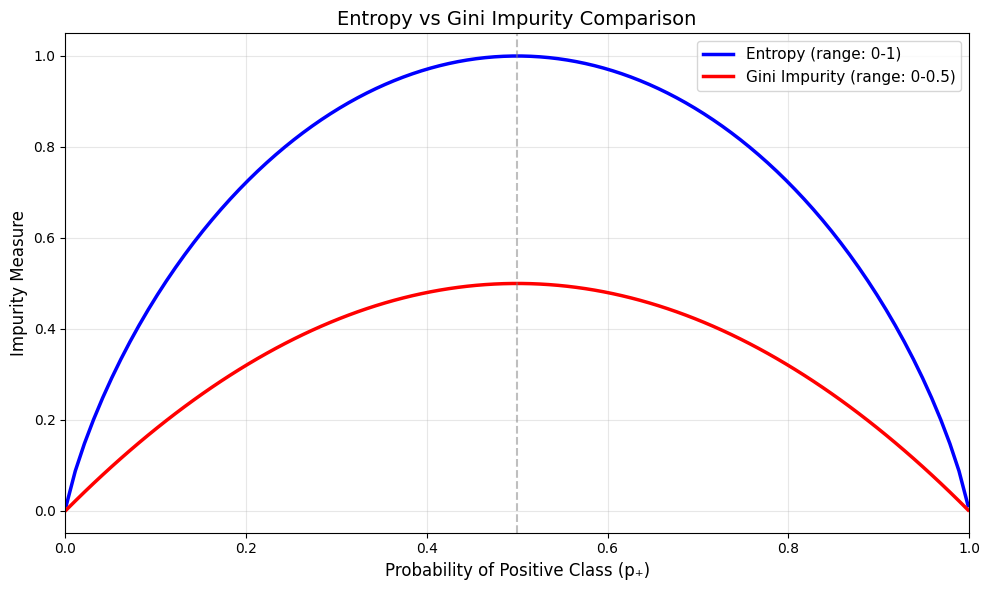

In [5]:
# Visualize Entropy vs Gini Impurity
import matplotlib.pyplot as plt
import numpy as np

p = np.linspace(0.001, 0.999, 100)
entropy_values = -p * np.log2(p) - (1-p) * np.log2(1-p)
gini_values = 1 - p**2 - (1-p)**2

plt.figure(figsize=(10, 6))
plt.plot(p, entropy_values, 'b-', linewidth=2.5, label='Entropy (range: 0-1)')
plt.plot(p, gini_values, 'r-', linewidth=2.5, label='Gini Impurity (range: 0-0.5)')
plt.axvline(x=0.5, color='gray', linestyle='--', alpha=0.5)
plt.xlabel('Probability of Positive Class (p₊)', fontsize=12)
plt.ylabel('Impurity Measure', fontsize=12)
plt.title('Entropy vs Gini Impurity Comparison', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

<div style="background-color: #338f3aff; border-left: 5px solid #2e7d32; padding: 15px; margin: 15px 0; border-radius: 0 8px 8px 0;">
    <strong>💡 Tip:</strong> When to use what?
    <ul>
        <li><strong>Small dataset (&lt; 10,000 records):</strong> Entropy is fine</li>
        <li><strong>Large dataset:</strong> Use Gini Impurity (faster computation)</li>
        <li><strong>Default choice:</strong> Gini Impurity (sklearn default)</li>
    </ul>
</div>

---
<a id="6-information-gain"></a>
# 6. Information Gain

## Core Concept

Information Gain determines **which feature to split on** by measuring how much a split reduces impurity.

<div style="background-color: #3576a5ff; border-left: 5px solid #1565c0; padding: 15px; margin: 15px 0; border-radius: 0 8px 8px 0;">
    <strong>📘 Definition:</strong> <strong>Information Gain</strong> = Entropy before split − Weighted entropy after split
</div>

## Formula

$$\Large \boxed{IG(S, Feature) = H(S) - \sum_{v \in Values} \frac{|S_v|}{|S|} \cdot H(S_v)}$$

Where:
- $H(S)$ = Entropy of the root node (before split)
- $S_v$ = Subset of samples after split for value $v$
- $|S_v|$ = Number of samples in subset $v$
- $|S|$ = Total number of samples
- $H(S_v)$ = Entropy of subset $v$

<div style="background-color: #a52f41ff; border-left: 5px solid #c62828; padding: 15px; margin: 15px 0; border-radius: 0 8px 8px 0;">
    <strong>⚠️ Important:</strong> Higher Information Gain = Better Feature for Splitting
</div>

## Step-by-Step Calculation Example

**Given Data:**
- Root Node: 9 Yes, 5 No (Total: 14)
- After split on Feature $F_1$:
  - $C_1$: 6 Yes, 2 No (Total: 8)
  - $C_2$: 3 Yes, 3 No (Total: 6)

### Step 1: Calculate Root Entropy

$$H(S) = -\frac{9}{14}\log_2\left(\frac{9}{14}\right) - \frac{5}{14}\log_2\left(\frac{5}{14}\right) \approx \boxed{0.94}$$

### Step 2: Calculate Child Entropy for $C_1$

$$H(C_1) = -\frac{6}{8}\log_2\left(\frac{6}{8}\right) - \frac{2}{8}\log_2\left(\frac{2}{8}\right) \approx \boxed{0.81}$$

### Step 3: Calculate Child Entropy for $C_2$

$$H(C_2) = -\frac{3}{6}\log_2\left(\frac{3}{6}\right) - \frac{3}{6}\log_2\left(\frac{3}{6}\right) = \boxed{1.0}$$

### Step 4: Calculate Information Gain

$$\begin{align}
IG(S, F_1) &= H(S) - \left[\frac{|S_{C_1}|}{|S|} \cdot H(C_1) + \frac{|S_{C_2}|}{|S|} \cdot H(C_2)\right] \\
&= 0.94 - \left[\frac{8}{14} \times 0.81 + \frac{6}{14} \times 1.0\right] \\
&= 0.94 - [0.463 + 0.429] \\
&= 0.94 - 0.892 \\
&= \boxed{0.048}
\end{align}$$

In [6]:
# Information Gain Calculation in Python
import numpy as np

def entropy(y):
    """Calculate entropy of a label array"""
    if len(y) == 0:
        return 0
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return -np.sum(probabilities * np.log2(probabilities + 1e-10))

def information_gain(parent, left_child, right_child):
    """Calculate information gain for a split"""
    n = len(parent)
    n_left, n_right = len(left_child), len(right_child)
    
    parent_entropy = entropy(parent)
    weighted_child_entropy = (n_left/n) * entropy(left_child) + (n_right/n) * entropy(right_child)
    
    return parent_entropy - weighted_child_entropy

# Example calculation
parent = ['Yes']*9 + ['No']*5  # 9 Yes, 5 No
left_child = ['Yes']*6 + ['No']*2  # 6 Yes, 2 No
right_child = ['Yes']*3 + ['No']*3  # 3 Yes, 3 No

print(f"Parent Entropy: {entropy(parent):.4f}")
print(f"Left Child Entropy: {entropy(left_child):.4f}")
print(f"Right Child Entropy: {entropy(right_child):.4f}")
print(f"Information Gain: {information_gain(parent, left_child, right_child):.4f}")

Parent Entropy: 0.9403
Left Child Entropy: 0.8113
Right Child Entropy: 1.0000
Information Gain: 0.0481


## Feature Selection Process

```
┌─────────────────────────────────────┐
│  Calculate IG for each feature      │
└─────────────────┬───────────────────┘
                  │
                  ▼
┌─────────────────────────────────────┐
│  Compare all IG values              │
└─────────────────┬───────────────────┘
                  │
                  ▼
┌─────────────────────────────────────┐
│  Select feature with HIGHEST IG     │
└─────────────────┬───────────────────┘
                  │
                  ▼
┌─────────────────────────────────────┐
│  Split on that feature              │
└─────────────────────────────────────┘
```

---
<a id="7-numerical-feature-splits"></a>
# 7. Decision Tree Split for Numerical Features

## Challenge

Categorical features have fixed categories to split on. But numerical features are continuous — **where should we split?**

## Algorithm

1. **Sort** feature values in ascending order
2. **Create multiple splits** at different threshold values
3. **Calculate Information Gain** for each split
4. **Select threshold** with highest Information Gain

## Example

| Experience (sorted) | Play Tennis |
|:-------------------:|:-----------:|
| 2.3 | Yes |
| 3.6 | Yes |
| 4.0 | No |
| 5.2 | Yes |
| 6.1 | No |

**Try Split at 2.3:**
- Left (≤ 2.3): 1 Yes, 0 No
- Right (> 2.3): 2 Yes, 2 No
- Calculate IG → $IG_1$

**Try Split at 3.6:**
- Left (≤ 3.6): 2 Yes, 0 No
- Right (> 3.6): 1 Yes, 2 No
- Calculate IG → $IG_2$

Compare all IG values and select threshold with **maximum IG**.

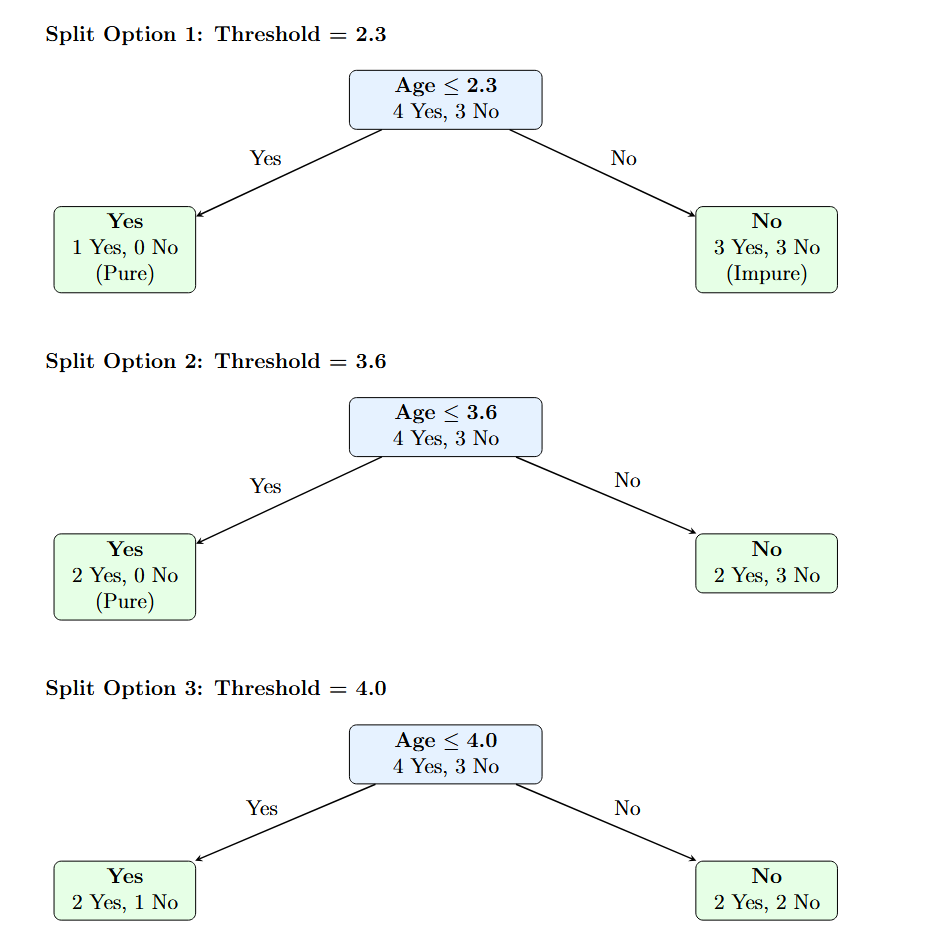

<div style="background-color: #a5313cff; border-left: 5px solid #b71c1c; padding: 15px; margin: 15px 0; border-radius: 0 8px 8px 0;">
    <strong>⛔ Warning:</strong> <strong>Disadvantage:</strong> High time complexity for large datasets with millions of records — need to evaluate many possible thresholds.
</div>

In [7]:
# Finding best threshold for numerical feature
import numpy as np

def find_best_threshold(X, y):
    """Find the best threshold for splitting a numerical feature"""
    sorted_indices = np.argsort(X)
    X_sorted = X[sorted_indices]
    y_sorted = y[sorted_indices]
    
    best_ig = -1
    best_threshold = None
    
    for i in range(1, len(X_sorted)):
        threshold = (X_sorted[i-1] + X_sorted[i]) / 2
        left_mask = X <= threshold
        right_mask = ~left_mask
        
        ig = information_gain(y, y[left_mask], y[right_mask])
        
        if ig > best_ig:
            best_ig = ig
            best_threshold = threshold
    
    return best_threshold, best_ig

# Example
X = np.array([2.3, 3.6, 4.0, 5.2, 6.1])
y = np.array(['Yes', 'Yes', 'No', 'Yes', 'No'])

threshold, ig = find_best_threshold(X, y)
print(f"Best threshold: {threshold}")
print(f"Information Gain: {ig:.4f}")

Best threshold: 3.8
Information Gain: 0.4200


---
<a id="8-pruning-techniques"></a>
# 8. Pruning: Preventing Overfitting

## The Overfitting Problem

- Decision tree splits until all leaf nodes are pure
- Results in very deep trees that memorize training data
- High training accuracy, low test accuracy
- **Low Bias, High Variance**

## Two Pruning Techniques

| | Post-Pruning | Pre-Pruning |
|:--|:-------------|:------------|
| **When** | After tree is fully built | During tree construction |
| **How** | Remove branches that don't improve performance | Set constraints before building |
| **Method** | Cut branches where majority class is dominant | Hyperparameter tuning |
| **Best for** | Smaller datasets | Larger datasets |

## Post-Pruning Visualization

```
BEFORE PRUNING:                    AFTER PRUNING:
                                   
    ┌──────────┐                      ┌──────────┐
    │ 9Y, 2N   │                      │ 9Y, 2N   │
    └────┬─────┘                      └──────────┘
         │                                  │
    ┌────┴────┐                   Predict: YES
    │         │                   (majority class)
    ▼         ▼              
┌──────┐ ┌──────┐           Since 9Y:2N is heavily skewed
│ 9Y,0N│ │ 0Y,2N│           toward Yes, the split is
└──────┘ └──────┘           unnecessary - PRUNE IT!
```

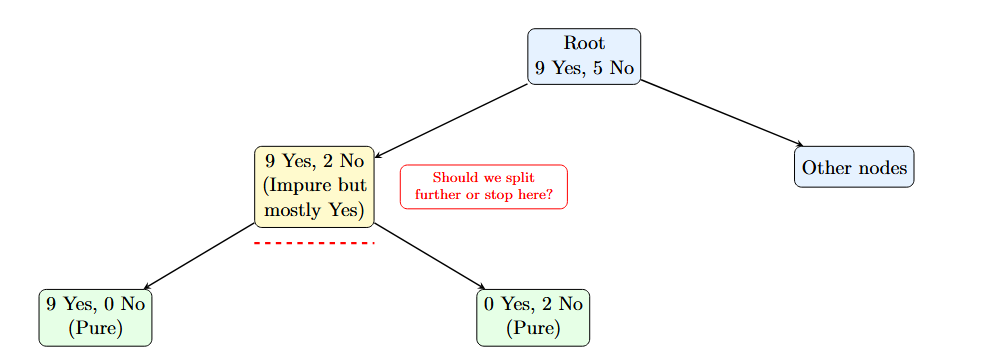

## Pre-Pruning: Key Hyperparameters

| Parameter | Description |
|:----------|:------------|
| `max_depth` | Maximum depth of the tree |
| `min_samples_split` | Minimum samples required to split a node |
| `min_samples_leaf` | Minimum samples required in a leaf node |
| `max_features` | Maximum features to consider for split |
| `max_leaf_nodes` | Maximum number of leaf nodes |
| `criterion` | "gini" or "entropy" |

<div style="background-color: #3b8e42ff; border-left: 5px solid #2e7d32; padding: 15px; margin: 15px 0; border-radius: 0 8px 8px 0;">
    <strong>💡 Tip:</strong> Use <strong>GridSearchCV</strong> or <strong>RandomizedSearchCV</strong> for hyperparameter tuning to find optimal pre-pruning parameters.
</div>

In [8]:
# Pre-pruning with hyperparameter tuning
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

# Load data
X, y = load_iris(return_X_y=True)

# Define hyperparameter grid
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Grid search
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

print("Best parameters:", grid_search.best_params_)
print(f"Best CV accuracy: {grid_search.best_score_:.4f}")

Best parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV accuracy: 0.9733


---
<a id="9-decision-tree-regressor"></a>
# 9. Decision Tree Regressor

## Core Concept

For regression, output is continuous → Cannot use Entropy/Gini (designed for categorical outputs).

<div style="background-color: #a33949ff; border-left: 5px solid #c62828; padding: 15px; margin: 15px 0; border-radius: 0 8px 8px 0;">
    <strong>⚠️ Important:</strong> Decision Tree Regressor uses <strong>Variance Reduction</strong> and <strong>Mean Squared Error (MSE)</strong> instead of Information Gain.
</div>

## Variance Formula

$$\Large \boxed{Variance = \frac{1}{n}\sum_{i=1}^{n}(y_i - \bar{y})^2}$$

Where:
- $y_i$ = Actual value
- $\bar{y}$ = Mean of all values
- This is essentially **Mean Squared Error (MSE)**


<div style="background-color: #3c7f42ff; border-left: 5px solid #2e7d32; padding: 15px; margin: 15px 0; border-radius: 0 8px 8px 0;">
    <strong>📝 Note:</strong>This is also called Mean Squared Error (MSE) in regression context

</div>


## Variance Reduction Formula

$$\Large \boxed{VR = Var(root) - \sum_{i} \frac{|S_i|}{|S|} \cdot Var(child_i)}$$

Where:
- $VR$ is the variance reduction
- $Var(root)$ is the variance of the root node
- $S$ is the dataset
- $S_i$ is the ith subset of the dataset
- $|S_i|$ is the number of samples in the ith subset
- $|S|$ is the total number of samples in the dataset
- $Var(child_i)$ is the variance of the ith child node

<div style="background-color: #3274a4ff; border-left: 5px solid #1565c0; padding: 15px; margin: 15px 0; border-radius: 0 8px 8px 0;">
    <strong>📘 Definition:</strong> Higher Variance Reduction = Better Split
</div>

## Complete Example
**Problem:** Predict Salary (continuous output) based on Experience and Career Gap

**Salary Prediction Dataset:**

| Experience (Years) | Gap (Years) | Salary (K) |
|:----------:|:---:|:----------:|
| 2 | 0 | 40 |
| 3 | 1 | 42 |
| 5 | 0 | 52 |
| 7 | 1 | 60 |
| 6 | 0 | 56 |

$$\bar{y} = \frac{40+42+52+60+56}{5} = 50K$$

### Step 1: Calculate Root Variance

$$\begin{align}
Var(root) &= \frac{1}{5}\left[(40-50)^2 + (42-50)^2 + (52-50)^2 + (60-50)^2 + (56-50)^2\right] \\
&= \frac{1}{5}[100 + 64 + 4 + 100 + 36] \\
&= \frac{304}{5} = \boxed{60.8}
\end{align}$$

#### Consider two split thresholds based on Experience:
```
• Split 1: Experience ≤ 2.0
• Split 2: Experience ≤ 2.5

### Split 1: Experience ≤ 2

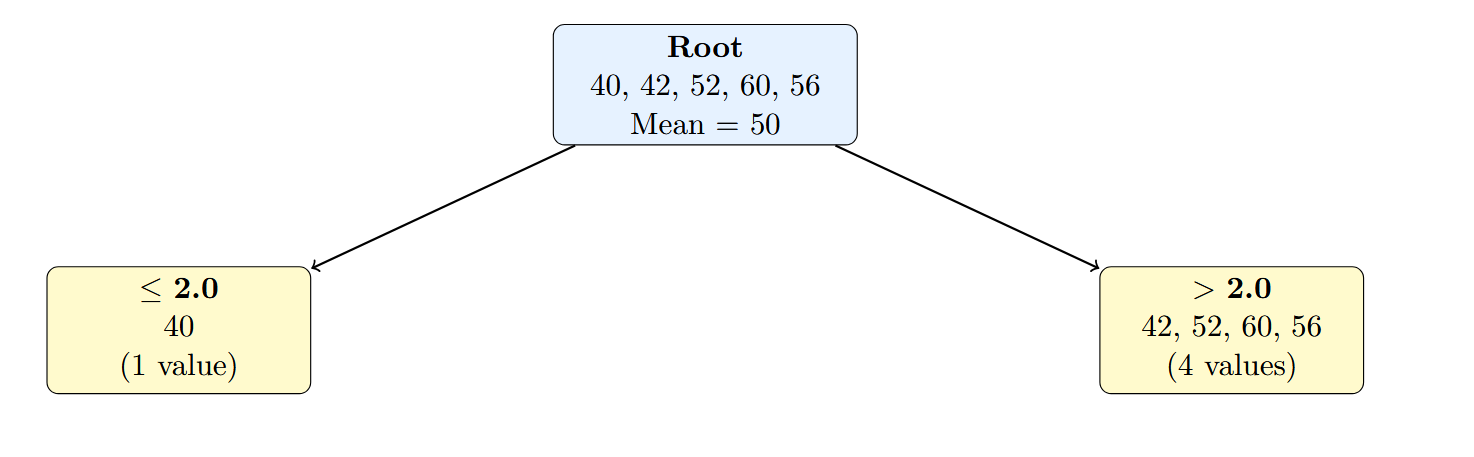

- **Left:** {40}
  - $Var(C_1) = (40-50)^2 = 100$
  
- **Right:** {42, 52, 60, 56}
  - $Var(C_2) = \frac{1}{4}[64 + 4 + 100 + 36] = 51$

**Variance Reduction:**
$$VR_1 = 60.8 - \left[\frac{1}{5} \times 100 + \frac{4}{5} \times 51\right] = 60.8 - 60.8 = \boxed{0}$$

### Split 2: Experience ≤ 2.5

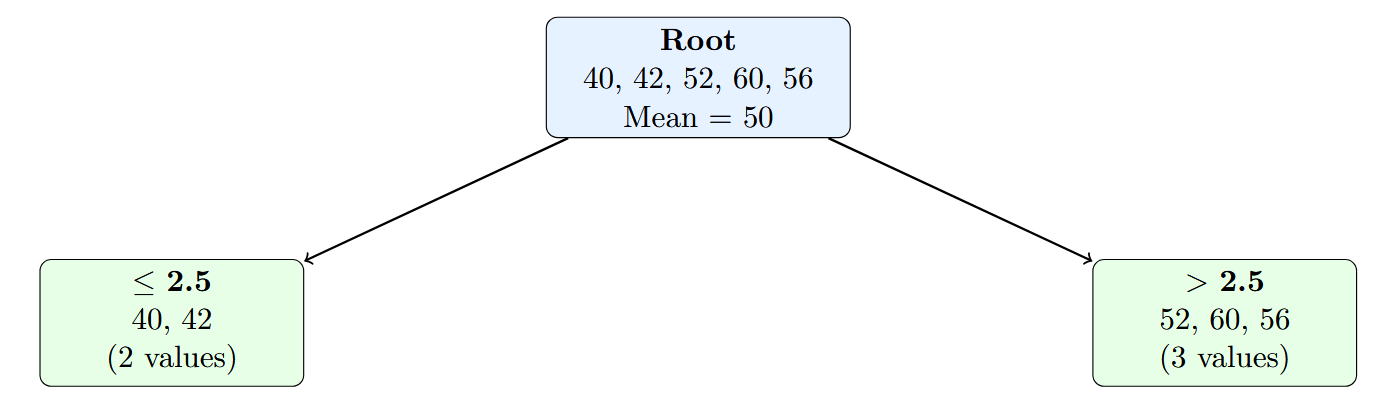

- **Left:** {40, 42}
  - $Var(C_1) = \frac{1}{2}[(40-50)^2 + (42-50)^2] = 82$
  
- **Right:** {52, 60, 56}
  - $Var(C_2) = \frac{1}{3}[4 + 100 + 36] = 46.67$

**Variance Reduction:**
$$VR_2 = 60.8 - \left[\frac{2}{5} \times 82 + \frac{3}{5} \times 46.67\right] = 60.8 - 60.8 = \boxed{0.004}$$

$$
VR_2 (0.004) > VR_1 (0)
$$

<div style="background-color: #a53949ff; border-left: 5px solid #c62828; padding: 15px; margin: 15px 0; border-radius: 0 8px 8px 0;">
    <strong>⚠️ Important:</strong><br>
    ∴ Split at <strong>Experience ≤ 2.5</strong> is better!
</div>


## Prediction in Regression

At leaf node: **Prediction = Average of all values in that leaf**

```
           ┌──────────────────┐
           │   Exp ≤ 2.5?     │
           └────────┬─────────┘
                    │
        ┌───────────┴───────────┐
        │ Yes                   │ No
        ▼                       ▼
   ┌──────────┐           ┌──────────┐
   │ {40, 42} │           │{52,60,56}│
   │          │           │          │
   │Pred: 41K │           │Pred: 56K │
   └──────────┘           └──────────┘
```
```
• If Experience ≤ 2.5 ⇒ Predict 41K (average of 40, 42)
• If Experience > 2.5 ⇒ Predict 56K (average of 52, 60, 56)
```




<div style="background-color: #31ab47ff; border-left: 5px solid #c62828; padding: 15px; margin: 15px 0; border-radius: 0 8px 8px 0;">
    <strong>⚠️ Key Point: Leaf Node Prediction :</strong><br>

    In Decision Tree Regressor, the prediction at a leaf node is the AVERAGE (mean) of all training samples that reached that leaf.
    This is different from classification where we take the majority class.
</div>


In [9]:
# Decision Tree Regressor Example
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Sample data
X = np.array([[2, 0], [3, 1], [5, 0], [7, 1], [6, 0]])
y = np.array([40, 42, 52, 60, 56])

# Train model
dt_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
dt_reg.fit(X, y)

# Predictions
print("Predictions:")
for i, (xi, yi) in enumerate(zip(X, y)):
    pred = dt_reg.predict([xi])[0]
    print(f"  X={xi}, Actual={yi}K, Predicted={pred:.1f}K")

Predictions:
  X=[2 0], Actual=40K, Predicted=40.0K
  X=[3 1], Actual=42K, Predicted=42.0K
  X=[5 0], Actual=52K, Predicted=54.0K
  X=[7 1], Actual=60K, Predicted=60.0K
  X=[6 0], Actual=56K, Predicted=54.0K


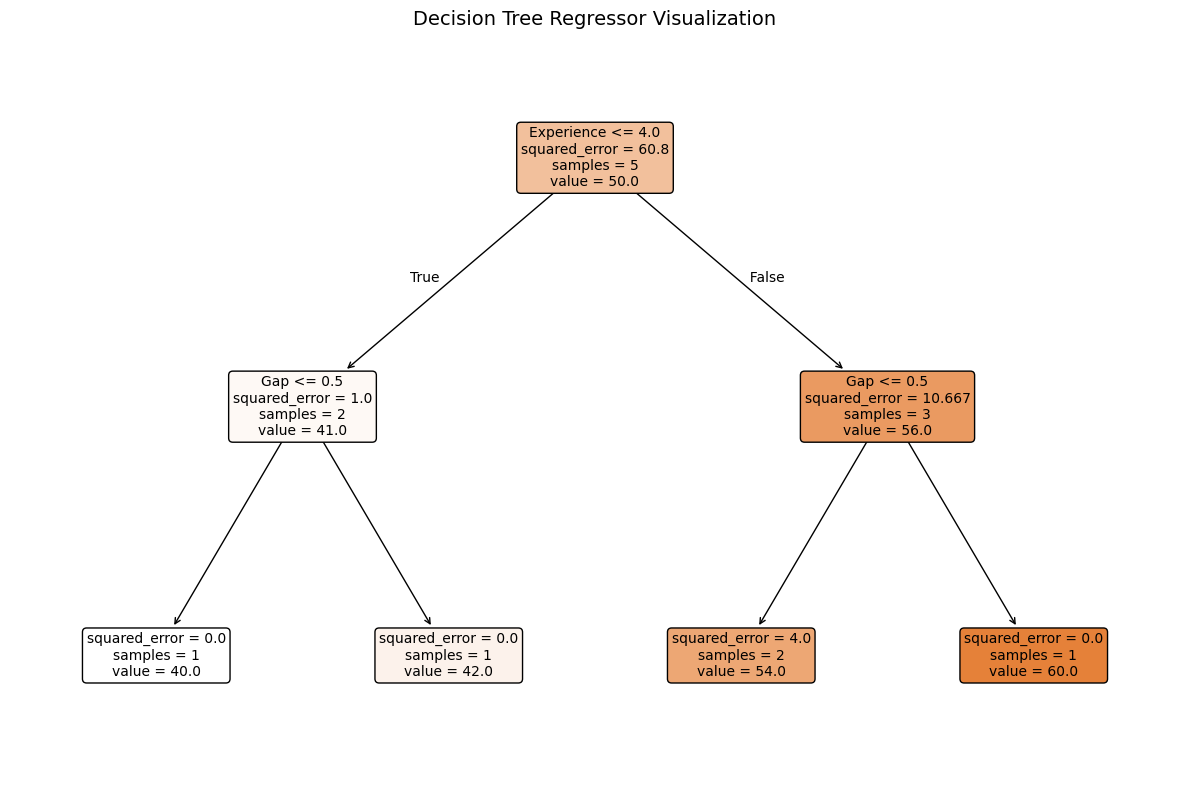

In [10]:
# Visualize the Decision Tree
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(dt_reg, 
          feature_names=['Experience', 'Gap'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Decision Tree Regressor Visualization', fontsize=14)
plt.tight_layout()
plt.show()

---
<a id="10-quick-revision-summary"></a>
# 10. Quick Revision Summary

## Decision Tree Classifier

| Purpose | Technique | Formula |
|:--------|:----------|:--------|
| Purity Check | Entropy | $H(S) = -\sum p_i \log_2(p_i)$ |
| Purity Check | Gini Impurity | $Gini = 1 - \sum p_i^2$ |
| Feature Selection | Information Gain | $IG = H(S) - \sum \frac{\lvert S_v \rvert}{\lvert S \rvert} H(S_v)$ |


## Decision Tree Regressor

| Purpose | Technique | Formula |
|:--------|:----------|:--------|
| Split Quality | Variance | $\frac{1}{n}\sum (y_i - \bar{y})^2$ |
| Feature Selection | Variance Reduction | $Var(root) - \sum \frac{\lvert S_i \rvert}{\lvert S \rvert} Var(child_i)$ |
| Prediction | Average | Mean of leaf node values |


## Key Decision Points

| Question | Answer |
|:---------|:-------|
| Entropy vs Gini? | Gini for large data (faster), Entropy for small |
| Which feature to split? | Highest Information Gain / Variance Reduction |
| When to stop splitting? | Pure node OR pruning constraints |
| Numerical features? | Try multiple thresholds, pick best IG |
| Overfitting solution? | Pre-pruning or Post-pruning |
| sklearn default? | CART + Gini Impurity |

---
<a id="11-interview-questions"></a>
# 11. Common Interview Questions

<div style="background-color: #a98d32ff; border-left: 5px solid #ff8f00; padding: 15px; margin: 15px 0; border-radius: 0 8px 8px 0;">
    <strong>📝 Note:</strong> These are frequently asked interview questions on Decision Trees.
</div>

### Q1: Difference between Entropy and Gini Impurity?

- **Entropy:** Range 0-1, uses log, slower computation
- **Gini:** Range 0-0.5, no log, faster computation

---

### Q2: What is Information Gain?

- Reduction in entropy after a split
- Higher IG = Better feature for splitting

---

### Q3: How to handle numerical features?

- Sort values, try multiple thresholds, pick best IG

---

### Q4: How to prevent overfitting in Decision Trees?

- **Pre-pruning:** Set `max_depth`, `min_samples_split`
- **Post-pruning:** Build full tree, then remove branches

---

### Q5: Difference between ID3 and CART?

- **ID3:** Multi-way splits possible
- **CART:** Binary splits only (sklearn uses this)

---

### Q6: What metric does Decision Tree Regressor use?

- Variance Reduction (based on MSE)

---

### Q7: What is a pure vs impure split?

- **Pure:** Only one class in node (Entropy=0, Gini=0)
- **Impure:** Mixed classes in node

---
<div style="background: linear-gradient(135deg, #1a1a2e 0%, #16213e 100%); padding: 20px; border-radius: 10px; margin-top: 30px;">
    <h3 style="color: #ffffff; text-align: center; margin: 0;">🎯 End of Decision Tree Notes</h3>
    <p style="color: #a0a0a0; text-align: center; margin-top: 10px;">Master these concepts for interviews and practical applications!</p>
</div>